 # Simple Random Walk

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

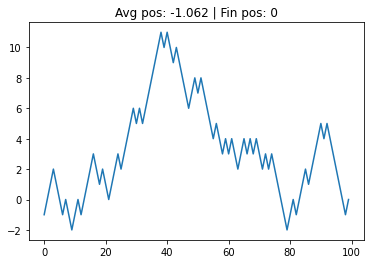

In [2]:
# Simple Python implementation
pos = 0
walk = []
n_steps = 1000

for _ in range(n_steps):
  # eg: like a coin toss, only +1 or -1
  step = 1 if random.randint(0,1) else -1
  pos += step
  walk.append(pos)

plt.plot(walk[:100])
plt.title(f"Avg pos: {np.mean(walk)} | Fin pos: {walk[99]}")
plt.show()

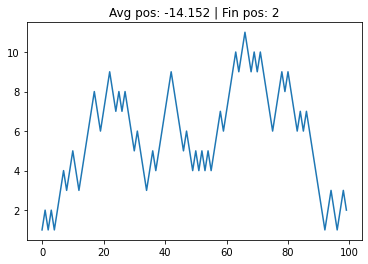

In [3]:
# Numpy implementation
draws = np.random.randint(0,2, size=n_steps)
steps = np.where(draws, 1, -1)
np_walk = steps.cumsum()

plt.plot(np_walk[:100])
plt.title(f"Avg pos: {np.mean(np_walk)} | Fin pos: {np_walk[99]}")
plt.show()

In [4]:
# Simple stats
np_walk.min()

-38

In [5]:
np_walk.max()

11

In [6]:
# Let's say we want to find out the first crossing time of the walk exceeding 10 steps (+ or -)
(np.abs(np_walk) == 10).argmax()

63

 **Note**: `argmax` isn't the most efficient method of finding the first True value.
 ### Power of array-oriented programming
 The above was for only one walk of 1000 steps, let's simulate 5000 walks (each has 1000 steps):

In [7]:
n_walks = 5000
multi_draws = np.random.randint(0,2, size=(n_walks, n_steps))
# multi_draws.shape
multi_steps = np.where(multi_draws, 1, -1)
multi_walk = multi_steps.cumsum(axis=1)

multi_walk

array([[ -1,   0,   1, ...,  16,  15,  14],
       [  1,   0,   1, ...,  32,  33,  32],
       [ -1,   0,  -1, ...,  26,  27,  26],
       ...,
       [  1,   0,   1, ...,   6,   5,   6],
       [ -1,  -2,  -3, ...,   6,   5,   6],
       [ -1,   0,  -1, ..., -12, -13, -14]])

In [8]:
multi_walk.max()

117

In [9]:
multi_walk.min()

-116

 **Note**: not all walks hit 30 steps
 Does any walk go beyond 30 steps, if yes return `True` else `False`.

In [10]:
# First part creates boolean arrays for each walk, next creates a 1D boolean array.
cross30 = (np.abs(multi_walk) == 30).any(axis=1)
cross30

array([ True,  True,  True, ..., False, False,  True])

In [11]:
# Total number of walks that crossed the 30-step threshold
cross30.sum()

3344

 We can use the above boolean array to slice out the walks that have crossed 30 steps.

In [12]:
crossing_time = (np.abs(multi_walk[cross30]) == 30).argmax(axis=1)
crossing_time

array([877, 169, 305, ..., 629, 347, 623])

In [13]:
# Verify the first case of crossing 30:
multi_walk[cross30.argmax(),crossing_time[0]]

30

 Calculate some stats for crossing time:

In [14]:
# Fastest crossing time:
crossing_time.min()

49

In [15]:
# Slowest crossing time:
crossing_time.max()

999

In [16]:
# Mean crossing time:
crossing_time.mean()

501.1638755980861